In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from pathlib import Path
from cycler import cycler
from scipy.signal import medfilt
%matplotlib inline

Load data:

In [2]:
filename_list=glob('./data/*.txt')

In [3]:
print(filename_list[0][7:-4])

ST_72%_4hRA140


In [4]:
data={}
for file in filename_list:
    test_name=file[7:-4]
    data[test_name]=np.loadtxt(file, skiprows=1)

In [5]:
sorted(data.keys())

['PA_20%_0h RA140',
 'PA_20%_4h RA140',
 'PA_72%_0hRA',
 'PA_72%_4hRA140',
 'ST_20%_0h RA140',
 'ST_20%_4h RA140',
 'ST_72%_0hRA',
 'ST_72%_4hRA140',
 'T6_6']

In [6]:
def plot_values(values):
    strain=values[:,0]
    stress=values[:,1]
    plt.plot(strain, stress,'--')

In [7]:
def plot_data(data):
    fig,ax= plt.subplots()
    ax.set_prop_cycle(custom_cycler)
    for test, values in sorted(data.items()):
        eng_strain=values[:,0]/100
        strain=np.log(1+eng_strain)
        eng_stress=values[:,1]
        stress=eng_stress*(1+eng_strain)
        ax.plot(strain[::10], stress[::10], lw=2)
    ax.set_ylabel('Stress (MPa)')
    ax.set_xlabel('Strain')
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed',alpha=0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.5)
    plt.legend(sorted(data.keys()))
    return fig

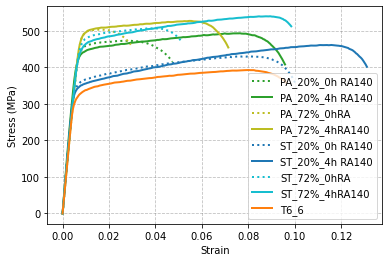

In [8]:
custom_cycler = (cycler(color=['tab:green']*2+['tab:olive']*2+['tab:blue']*2+['tab:cyan']*2+['tab:orange'])+
                 cycler(linestyle=[':','-',':','-',':','-',':','-','-']))
all_stress_strain_curves=plot_data(data)

In [9]:
all_stress_strain_curves.savefig('stress-strain.png', dpi=150)

In [10]:
comp_data={k:data[k] for k in ('T6_6','ST_72%_4hRA140') if k in data}

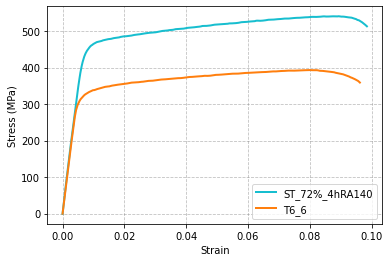

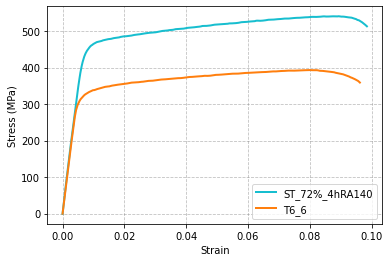

In [11]:
custom_cycler=(cycler(color=['tab:cyan','tab:orange'] ))
plot_data(comp_data)

## Strain variability

In [12]:
t6_strain=np.log(1+data['T6_6'][:,0])
t6_stress= data['T6_6'][:,1]*(1+data['T6_6'][:,0])

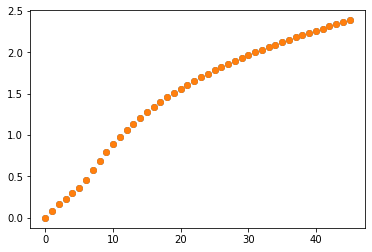

In [13]:
plt.figure()
plt.plot(t6_strain[::50],'o')
plt.plot(medfilt(t6_strain,11)[::50],'o')

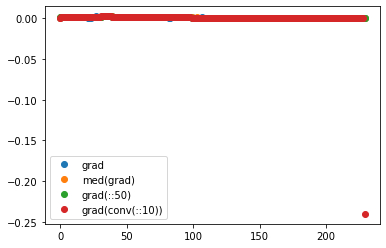

In [14]:
plt.figure()
plt.plot(np.gradient(t6_strain)[::10],'o')

plt.plot(medfilt(np.gradient(t6_strain),11)[::10],'o')
plt.plot(np.gradient(t6_strain[::10],10),'o')
plt.plot(np.gradient(np.convolve(t6_strain, np.ones(10,)/10, mode='same'))[::10],'o')
plt.legend(['grad','med(grad)','grad(::50)','grad(conv(::10))'])

## Stress variability

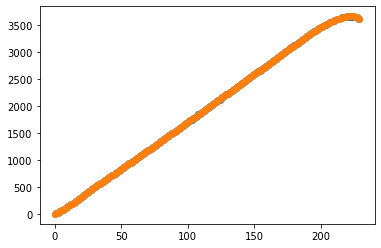

In [15]:
plt.figure()
plt.plot(t6_stress[::10],'o')
plt.plot(medfilt(t6_stress,11)[::10],'o')

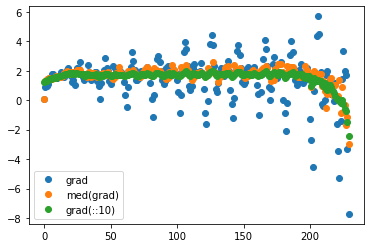

In [16]:
plt.figure()
plt.plot(np.gradient(t6_stress)[::10],'o')
plt.plot(medfilt(np.gradient(t6_stress),11)[::10],'o')
plt.plot(np.gradient(t6_stress[::10],10),'o')
plt.legend(['grad','med(grad)','grad(::10)'])

## Work hardening

In [17]:
def calc_work_hard(values,n=50):
    eng_strain=values[:,0]/100
    strain=(np.log(1+eng_strain))[::n]
    eng_stress=values[:,1]
    stress=(eng_stress*(1 + eng_strain))[::n]
    work_hard=(np.gradient(stress,n)/np.gradient(strain,n))
    return strain, stress, work_hard

In [18]:
def calc_work_hard_correct(values,n=50):
    eng_strain=values[:,0]/100
    eng_stress=values[:,1]
    stress=(eng_stress*(1 + eng_strain))
    elastic_strain=stress/60e3
    eng_strain=eng_strain-elastic_strain
    strain=(np.log(1+eng_strain))[::n]
    stress=(eng_stress*(1 + eng_strain))[::n]
    work_hard=(np.gradient(stress,n)/np.gradient(strain,n))
    return strain, stress, work_hard

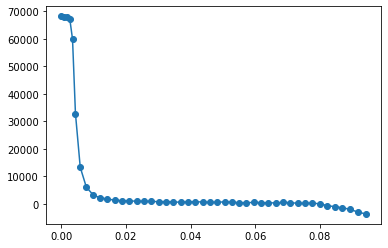

In [19]:
strain,stress,work_hard=calc_work_hard(data['T6_6'])
plt.figure()
plt.plot(strain, work_hard,'-o')

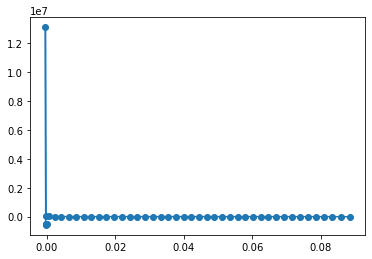

In [20]:
strain,stress,work_hard=calc_work_hard_correct(data['T6_6'])
plt.figure()
plt.plot(strain, work_hard,'-o')

In [21]:
custom_cycler = (cycler(color=['tab:green']*2+['tab:olive']*2+['tab:blue']*2+['tab:cyan']*2+['tab:orange'])+
                 cycler(linestyle=[':','-',':','-',':','-',':','-','-']))
def plot_work_hard(data,n=50):
    fig,ax= plt.subplots()
    ax.set_prop_cycle(custom_cycler)
    for test, values in sorted(data.items()):
        strain,stress,work_hard=calc_work_hard(values,n=n)
        m=int(n/10)
        work_hard=np.convolve(work_hard, np.ones((m,))/m, mode='same')
        ax.plot(strain, work_hard)
    ax.set_ylim([0,10000])
    plt.legend(sorted(data.keys()))

In [22]:
custom_cycler = (cycler(color=['tab:green']*2+['tab:olive']*2+['tab:blue']*2+['tab:cyan']*2+['tab:orange'])+
                 cycler(linestyle=[':','-',':','-',':','-',':','-','-']))
def plot_work_hard_correct(data,n=50):
    fig,ax= plt.subplots()
    ax.set_prop_cycle(custom_cycler)
    for test, values in sorted(data.items()):
        strain,stress,work_hard=calc_work_hard_correct(values,n=n)
        m=int(n/10)
        work_hard=np.convolve(work_hard, np.ones((m,))/m, mode='same')
        ax.plot(strain, work_hard)
    ax.set_ylabel('Work hardening rate (MPa)')
    ax.set_xlabel('Strain')
    ax.set_axisbelow(True)
    ax.set_ylim([0,4000])
    ax.set_xlim(0.005,0.13)
    ax.yaxis.grid(color='gray', linestyle='dashed',alpha=0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.5)
    plt.legend(sorted(data.keys()))
    return fig

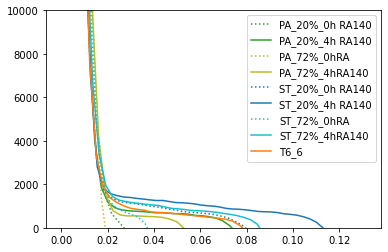

In [23]:
plot_work_hard(data,n=65)

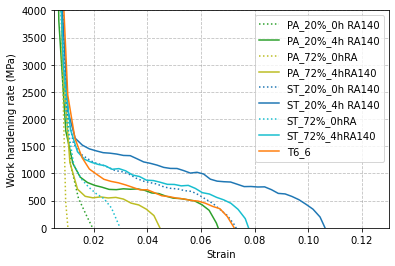

In [24]:
work_hardening_all=plot_work_hard_correct(data,n=60)

In [25]:
work_hardening_all.savefig('work_hardening_curves.png',dpi=150)

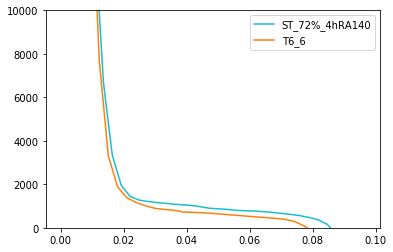

In [26]:
custom_cycler=(cycler(color=['tab:cyan','tab:orange'] ))
plot_work_hard(comp_data, n=65)

## Compare work hardening data

In [30]:
custom_cycler = (cycler(color=['tab:green']*2+['tab:olive']*2+['tab:blue']*2+['tab:cyan']*2+['tab:orange'])+
                 cycler(linestyle=[':','-',':','-',':','-',':','-','-']))

In [31]:
def plot_work_hard_comp(data):
    fig,ax= plt.subplots()
    ax.set_prop_cycle(custom_cycler)
    for a,n in zip([1,0.5,0.25],[65,60,55]):
        for test, values in sorted(data.items()):
            strain,stress,work_hard=calc_work_hard(values,n=n)
            m=int(n/10)
            work_hard=np.convolve(work_hard, np.ones((m,))/m, mode='same')
            ax.plot(strain, work_hard,alpha=a)
            ax.set_ylim([0,8000])
    plt.legend(sorted(data.keys()))

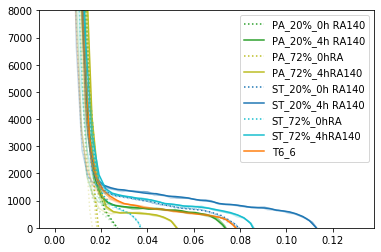

In [32]:
plot_work_hard_comp(data)

In [33]:
def calc_work_hard_filt(values, m=50):
    eng_strain=values[:,0]/100
    eng_stress=values[:,1]
    eng_strain_filt=np.convolve(eng_strain, np.ones((m,))/m, mode='same')
    eng_stress_filt=np.convolve(eng_stress, np.ones((m,))/m, mode='same')
    strain=(np.log(1+eng_strain))[::m]
    stress=(eng_stress*(1 + eng_strain))[::m]
    work_hard=(np.gradient(stress,m)/np.gradient(strain,m))
    return strain, stress, work_hard

def plot_work_hard_filt(data,m=50):
    fig,ax= plt.subplots()
    ax.set_prop_cycle(custom_cycler)
    for test, values in sorted(data.items()):
        strain,stress,work_hard=calc_work_hard_filt(values,m=m)
        ax.plot(strain, work_hard,'-o')
        ax.set_ylim([0,4000])
    plt.legend(sorted(data.keys()))

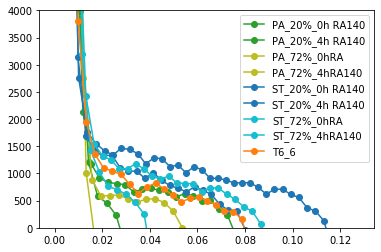

In [35]:
plot_work_hard_filt(data,m=80)